# `Predicting students' dropout and academic success`


## Project Topic

Going to college isn't for everyone. There are many factors that can be involved in one's decision to enroll into college such as financial problems, motivation, or location. For the students that do attend college, there are also many different factors that can determine the academic success for students. This can include a students' academic path, demographics, and social-economic status. 

This project aims to `predict` the dropout and success rate of a student based on the academic path, demographic, and social-economic status. The dataset being used is utilized to construct classification models that can predict students' likelihood of dropping out or achieving academic success. The ***classification*** problem is approached as a three-category task, with one of the classes being significantly more prevalent than the others.

## Goal

* Determine which academic path has the highest/lowest dropout and success rate
* See whether there is a significant correlation between students' demographic and dropout/success rate

## Data Source

This project uses the [Predict students' dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset from the UCI Machine Learning Repository.

This dataset is derived from multiple databases of a higher education institution and focuses on undergraduate students in various disciplines. These disciplines include agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset contains information about students' academic paths, demographics, socio-economic factors, and their academic performance at the end of the first and second semesters. 

The dataset was developed as part of a project aimed at addressing the issue of academic dropout and failure in higher education. The project employs machine learning techniques to identify students who are at risk of encountering difficulties early on in their academic journey. By identifying these students in advance, appropriate support strategies can be implemented. The dataset includes information about students' academic paths, demographics, and socio-economic factors available at the time of their enrollment.

The problem is formulated as a three-category classification task, considering three outcomes: dropout, enrollment, and graduation. This classification is performed at the end of the standard duration of the respective courses.

`Citation of the paper` (M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
import math
import csv

In [2]:
# Load in the dataset
data = pd.read_csv('data.csv', header=None)

#Preview of what the data looks like
data.head()

0
0  Marital status;Application mode;Application or...
1  1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
2  1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
3  1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
4  1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...

## Data Information

The data gathered is a mix of different types such as *discrete, continuous, and categorical*, and there is no missing values thoughout the whole data set. These are the attribute names with their type from the data collected:

- Marital status - `discrete`
- Application mode - `discrete`
- Application order - `discrete`
- Course - `discrete`
- Daytime/evening attendance - `discrete`
- Previous qualification - `discrete`
- Previous qualification (grade) - `continuous`
- Nacionality - `discrete`
- Mother's qualification - `discrete`
- Father's qualification - `discrete`
- Mother's occupation - `discrete`
- Father's occupation - `discrete`
- Admission grade - `continuous`
- Displaced - `discrete`
- Educational special needs - `discrete`
- Debtor - `discrete`
- Tuition fees up to date - `discrete`
- Gender - `discrete`
- Scholarship holder - `discrete`
- Age at enrollment - `discrete`
- International - `discrete`
- Curricular units 1st sem (credited) - `discrete`
- Curricular units 1st sem (enrolled) - `discrete`
- Curricular units 1st sem (evaluations) - `discrete`
- Curricular units 1st sem (approved) - `discrete`
- Curricular units 1st sem (grade) - `discrete`
- Curricular units 1st sem (without evaluations) - `discrete`
- Curricular units 2nd sem (credited) - `discrete`
- Curricular units 2nd sem (enrolled) - `discrete`
- Curricular units 2nd sem (evaluations) - `discrete`
- Curricular units 2nd sem (approved) - `discrete`
- Curricular units 2nd sem (grade) - `discrete`
- Curricular units 2nd sem (without evaluations) - `discrete`
- Unemployment rate	 - `continuous`
- Inflation rate - `continuous`
- GDP - `continuous`
- Target - `categorical`

## Dictionary of Dataset

This shows what each of the numbers in the dataset correpsonds to

In [3]:
# Read the CSV file
data = pd.read_csv('data.csv', delimiter=';')

# Define dictionaries for column formatting
marital_status_dict = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

application_mode_dict = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)',
}

application_order_dict = {}

course_dict = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

attendance_dict = {
    1: 'Daytime',
    0: 'Evening'
}

previous_qualification_dict = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master's",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

previous_qualification_grade_dict = {}

nationality_dict = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

mother_qualification_dict = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

father_qualification_dict = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

mother_occupation_dict = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

father_occupation_dict = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

admission_grade_dict = {}

displaced_dict = {
    1: 'Yes',
    0: 'No'
}

educational_special_needs_dict = {
    1: 'Yes',
    0: 'No'
}

debtor_dict = {
    1: 'Yes',
    0: 'No'
}

tuition_fees_up_to_date_dict = {
    1: 'Yes',
    0: 'No'
}

gender_dict = {
    1: 'Male',
    0: 'Female'
}

scholarship_holder_dict = {
    1: 'Yes',
    0: 'No'
}

international_dict = {
    1: 'Yes',
    0: 'No'
}

curricular_units_1st_sem_dict = {
    'credited': {},  # Number of curricular units credited in the 1st semester
    'enrolled': {},  # Number of curricular units enrolled in the 1st semester
    'evaluations': {},  # Number of evaluations to curricular units in the 1st semester
    'approved': {},  # Number of curricular units approved in the 1st semester
    'grade': {},  # Grade average in the 1st semester (between 0 and 20)
    'without evaluations': {}  # Number of curricular units without evaluations in the 1st semester
}

curricular_units_2nd_sem_dict = {
    'credited': {},  # Number of curricular units credited in the 2nd semester
    'enrolled': {},  # Number of curricular units enrolled in the 2nd semester
    'evaluations': {},  # Number of evaluations to curricular units in the 2nd semester
    'approved': {},  # Number of curricular units approved in the 2nd semester
    'grade': {},  # Grade average in the 2nd semester (between 0 and 20)
    'without evaluations': {}  # Number of curricular units without evaluations in the 2nd semester
}

unemployment_rate_dict = {}

inflation_rate_dict = {}

gdp_dict = {}

target_dict = {
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
}


# Format columns
data['Marital status'] = data['Marital status'].map(marital_status_dict)
data['Application mode'] = data['Application mode'].map(application_mode_dict)
data['Course'] = data['Course'].map(course_dict)
data['Daytime/evening attendance'] = data['Daytime/evening attendance'].map(attendance_dict)
data['Previous qualification'] = data['Previous qualification'].map(previous_qualification_dict)
data['Nacionality'] = data['Nacionality'].map(nationality_dict)
data['Mother qualification'] = data['Mother qualification'].map(mother_qualification_dict)
data['Father qualification'] = data['Father qualification'].map(father_qualification_dict)
data['Mother occupation'] = data['Mother occupation'].map(mother_occupation_dict)
data['Father occupation'] = data['Father occupation'].map(father_occupation_dict)
#data['Admission grade'] = data['Admission grade'].map(admission_grade_dict)
data['Displaced'] = data['Displaced'].map(displaced_dict)
data['Educational special needs'] = data['Educational special needs'].map(educational_special_needs_dict)
data['Debtor'] = data['Debtor'].map(debtor_dict)
data['Tuition fees up to date'] = data['Tuition fees up to date'].map(tuition_fees_up_to_date_dict)
data['Gender'] = data['Gender'].map(gender_dict)
data['Scholarship holder'] = data['Scholarship holder'].map(scholarship_holder_dict)
data['International'] = data['International'].map(international_dict)
# data['Unemployment rate'] = data['Unemployment rate'].map(unemployment_rate_dict)
# data['Inflation rate'] = data['Inflation rate'].map(inflation_rate_dict)
# data['GDP'] = data['GDP'].map(gdp_dict)
# data['Target'] = data['Target'].map(target_dict)

# Print formatted data
print(data[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance' ,'Previous qualification', 'Previous qualification (grade)',
             'Nacionality', 'Mother qualification', 'Father qualification', 'Mother occupation', 'Father occupation', 'Admission grade', 'Displaced', 'Educational special needs', 
             'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 
             'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
             'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
             'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']])

     Marital status                  Application mode  Application order   
0            Single    2nd phase - general contingent                  5  \
1            Single  International student (bachelor)                  1   
2            Single    1st phase - general contingent                  5   
3            Single    2nd phase - general contingent                  2   
4           Married                 Over 23 years old                  1   
...             ...                               ...                ...   
4419         Single    1st phase - general contingent                  6   
4420         Single    1st phase - general contingent                  2   
4421         Single    1st phase - general contingent                  1   
4422         Single    1st phase - general contingent                  1   
4423         Single            Ordinance No. 854-B/99                  1   

                                   Course Daytime/evening attendance   
0         Anima

## Data Cleaning



`Handling Missing Values:` This step involves identifying and dealing with any missing values in the dataset. Missing values can occur due to various reasons, and they can cause issues in data analysis and modeling. In the code provided, I mentioned that there are no missing values, but just in case, it would be filled in with 'N/A'. 

In [4]:
# Handle missing values
data = data.fillna('N/A')

`Renaming Columns for Better Readability:` In this step, I provided a dictionary called column_names that maps the original column names to new names for better readability and understanding. Renaming columns can make the dataset more user-friendly and facilitate clearer data analysis.

In [5]:
# Rename columns for better readability
column_names = {
    'Daytime/evening attendance': 'Attendance',
    'Previous qualification (grade)': 'Previous grade',
    'Curricular units 1st sem (credited)': 'Units 1st credited',
    'Curricular units 1st sem (enrolled)': 'Units 1st enrolled',
    'Curricular units 1st sem (evaluations)': 'Units 1st evaluations',
    'Curricular units 1st sem (approved)': 'Units 1st approved',
    'Curricular units 1st sem (grade)': 'Units 1st grade',
    'Curricular units 1st sem (without evaluations)': 'Units 1st w/o evaluations',
    'Curricular units 2nd sem (credited)': 'Units 2nd credited',
    'Curricular units 2nd sem (enrolled)': 'Units 2nd enrolled',
    'Curricular units 2nd sem (evaluations)': 'Units 2nd evaluations',
    'Curricular units 2nd sem (approved)': 'Units 2nd approved',
    'Curricular units 2nd sem (grade)': 'Units 2nd grade',
    'Curricular units 2nd sem (without evaluations)': 'Units 2nd w/o evaluations'
}

data = data.rename(columns=column_names)

`Encoding Categorical Variables:` Machine learning models require numerical data, so categorical variables need to be converted into a numerical format. In the provided code, we identified the categorical columns in the dataset and used one-hot encoding to convert them. One-hot encoding creates binary columns for each category in a categorical variable, indicating the presence (1) or absence (0) of that category for each data point.

For example, suppose you have a categorical variable 'Gender' with two categories: 'Male' and 'Female.' After one-hot encoding, this variable will be split into two binary columns, 'Gender_Male' and 'Gender_Female,' where 'Gender_Male' will have a value of 1 for male students and 0 for female students, and 'Gender_Female' will have a value of 1 for female students and 0 for male students.

In [6]:
# Encoding Categorical Variables
categorical_columns = [
    'Marital status',
    'Application mode',
    'Course',
    'Attendance',
    'Previous qualification',
    'Nacionality',
    'Mother qualification',
    'Father qualification',
    'Mother occupation',
    'Father occupation',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'International',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

data_encoded = pd.get_dummies(data, columns=categorical_columns)

`Handle Duplicate Data:` Check for and remove any duplicate rows in the dataset, if present. Duplicate data can skew the analysis and model training.

In [7]:
# Handle Duplicate Data
data.drop_duplicates(inplace=True)

`Drop Irrelevant Features:` If some columns are not relevant to the analysis or modeling, drop them. I feel like these columns would not be relevant to the goals that I am trying to achieve for this project.

In [8]:
# Drop other irrelevant columns
data.drop(['Marital status', 'Application mode', 'Application order', 'Attendance',
           'Previous qualification', 'Nacionality', 'Mother qualification', 'Father qualification',
           'Mother occupation', 'Father occupation', 'Displaced', 'Educational special needs',
           'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International',
           'Units 1st credited','Units 1st enrolled','Units 1st evaluations', 'Units 1st approved', 'Units 1st grade', 'Units 1st w/o evaluations',
           'Units 2nd credited','Units 2nd enrolled','Units 2nd evaluations', 'Units 2nd approved', 'Units 2nd grade', 'Units 2nd w/o evaluations'], axis=1, inplace=True)

In [9]:
print(data)

                                   Course  Previous grade  Admission grade   
0         Animation and Multimedia Design           122.0            127.3  \
1                                 Tourism           160.0            142.5   
2                    Communication Design           122.0            124.8   
3            Journalism and Communication           122.0            119.6   
4     Social Service (evening attendance)           100.0            141.5   
...                                   ...             ...              ...   
4419         Journalism and Communication           125.0            122.2   
4420         Journalism and Communication           120.0            119.0   
4421                              Nursing           154.0            149.5   
4422                           Management           180.0            153.8   
4423         Journalism and Communication           152.0            152.0   

      Gender  Age at enrollment  Unemployment rate  Inflation r

## Data Analysis

In [10]:
data.describe()

Previous grade  Admission grade  Age at enrollment  Unemployment rate   
count     4424.000000      4424.000000        4424.000000        4424.000000  \
mean       132.613314       126.978119          23.265145          11.566139   
std         13.188332        14.482001           7.587816           2.663850   
min         95.000000        95.000000          17.000000           7.600000   
25%        125.000000       117.900000          19.000000           9.400000   
50%        133.100000       126.100000          20.000000          11.100000   
75%        140.000000       134.800000          25.000000          13.900000   
max        190.000000       190.000000          70.000000          16.200000   

       Inflation rate          GDP  
count     4424.000000  4424.000000  
mean         1.228029     0.001969  
std          1.382711     2.269935  
min         -0.800000    -4.060000  
25%          0.300000    -1.700000  
50%          1.400000     0.320000  
75%          2.600000     1.790000  
max          3.700000     3.510000

As stated the goals of this project, I am trying to determine which academic path has the highest/lowest dropout and success rate and see whether there is a significant correlation between students' demographic and dropout/success rate.

### Academic path vs Dropout/Success Rate

The graph  shown below show a correlation between which course has the highest success rate and dropout rate. We can use this graph to see which path is successful or which proves to be too much for the majority of students who take it. 

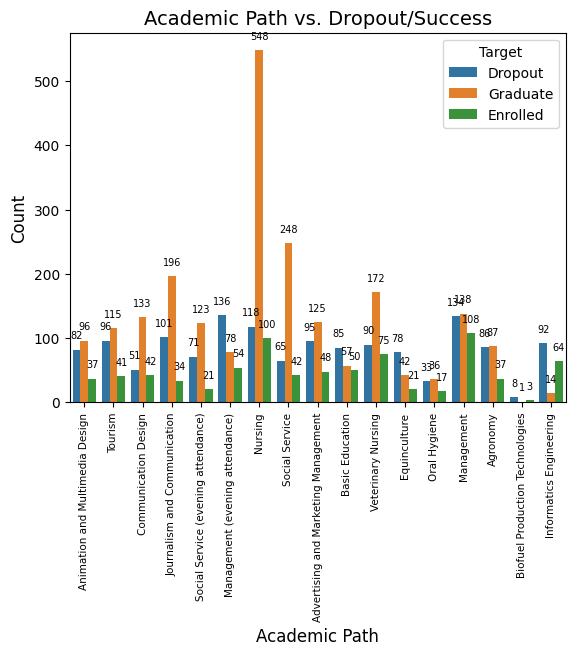

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Course' is the name of the column representing academic paths and 'Target' for dropout/success
ax = sns.countplot(x='Course', hue='Target', data=data)

# Customizing the plot
plt.title('Academic Path vs. Dropout/Success', fontsize=14)
plt.xlabel('Academic Path', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=7.5)  # Adjust the fontsize for x-axis labels
plt.yticks(fontsize=10)  # Adjust the fontsize for y-axis labels

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=7)

plt.show()

As we can see on the graph above, most academic paths have higher success rates than dropout rates, but there are still a few Academics paths which have more dropouts than graduates. Based on the data provided, the most successfull academic path would be **Nursing** as it has 548 graduates to 118 dropouts. The worst performing Academic path would be **Informatics Engineering** which has 92 dropouts compared to only 14 graduates.

The graph below shows the distribution of grades throughout the different academic paths that students chose. The grades of the **Nursing** path have a consistent grouping of grades which is around the overall mean of the grades at 126.98. That program does have many outliers that surpass the upper quartile and exceeds over a 180 in grade. The path with the lowest average grade would be from the **Biofuel Production Technologies** but they have a really small sample size compared to the other paths.

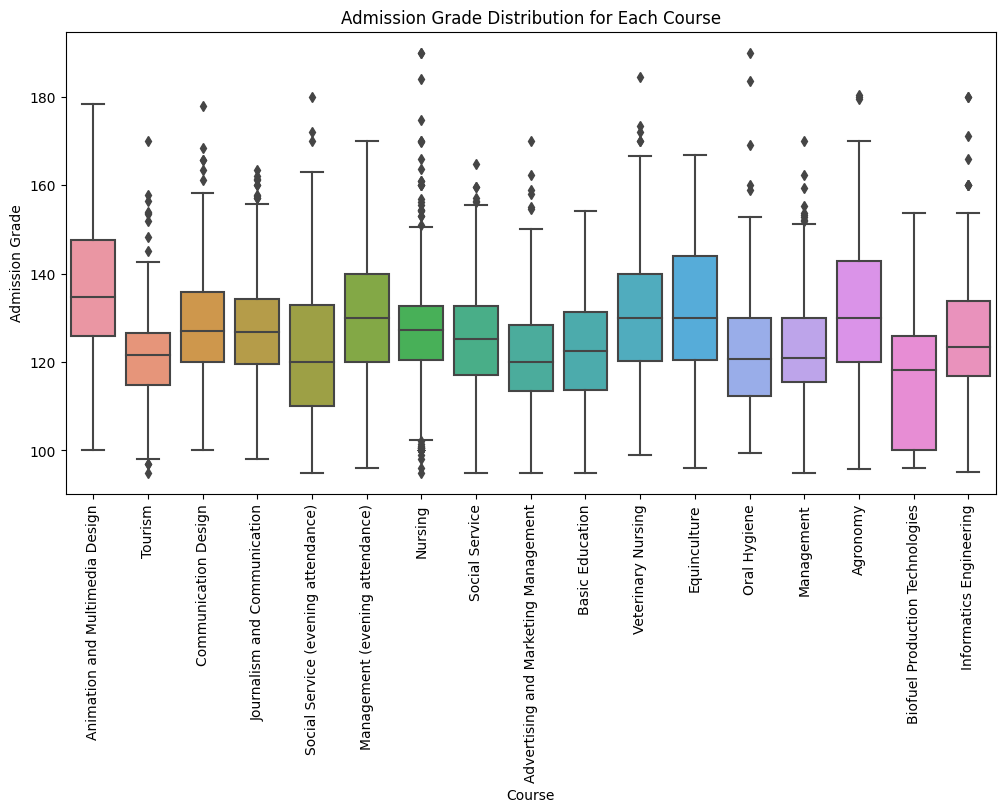

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Admission grade', data=data)
plt.title('Admission Grade Distribution for Each Course')
plt.xlabel('Course')
plt.ylabel('Admission Grade')
plt.xticks(rotation=90)
plt.show()

##

### Demographics vs Dropout/Sucess Rate

In this section, the graphs shown below try to show if there are certain demographic that would be more successfull in school than others.

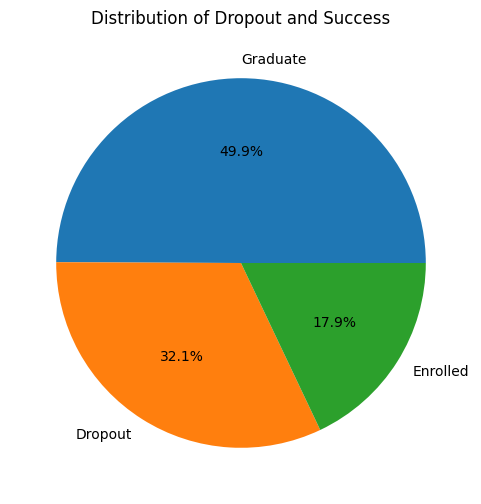

In [13]:
plt.figure(figsize=(6, 6))
data['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Dropout and Success')
plt.ylabel('')
plt.show()

The ratio of students graduating compared to dropping out wasn't as big of a gap as I thought. Out of the sample size of 4424 entries, 50% of the students graduated. I expected the graduation rate to be around 60-65%. This graph just shows the rate that students are having success compared to those that dropout with a difference of around 18%.

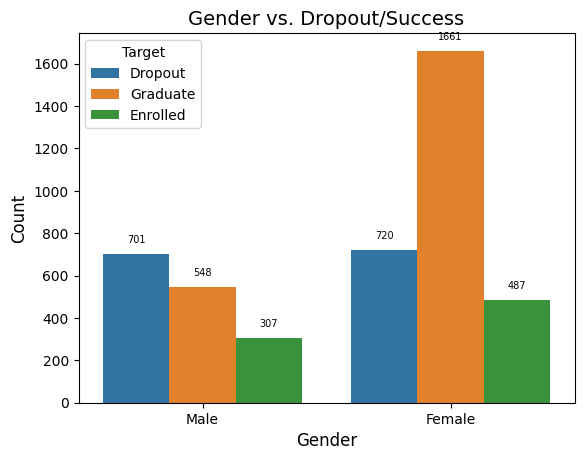

In [14]:
# Assuming 'Gender' is one of the demographic variables and 'Target' for dropout/success
ax = sns.countplot(x='Gender', hue='Target', data=data)

# Customizing the plot
plt.title('Gender vs. Dropout/Success', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)  # Adjust the fontsize for x-axis labels
plt.yticks(fontsize=10)  # Adjust the fontsize for y-axis labels

# Annotate each bar with its respective count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=7)

plt.show()

The difference between the dropout/success rate between male and female almost the opposite of each other. The total number of females is 2,868 compared to the 1,556 males in this data set. Even if the females numbers are significantly higher, their success rate is completely postive compared to their male counterparts. The females success rate is 57.9% compared the the males 35.2% that the males have. 

This graph below shows that majority of the females do go into **Nursing** which showed the high sucess rate of the program in the earlier chart. This chart also showed that mostly males took **Informatics Engineering** which led to a high dropout rate for that path.

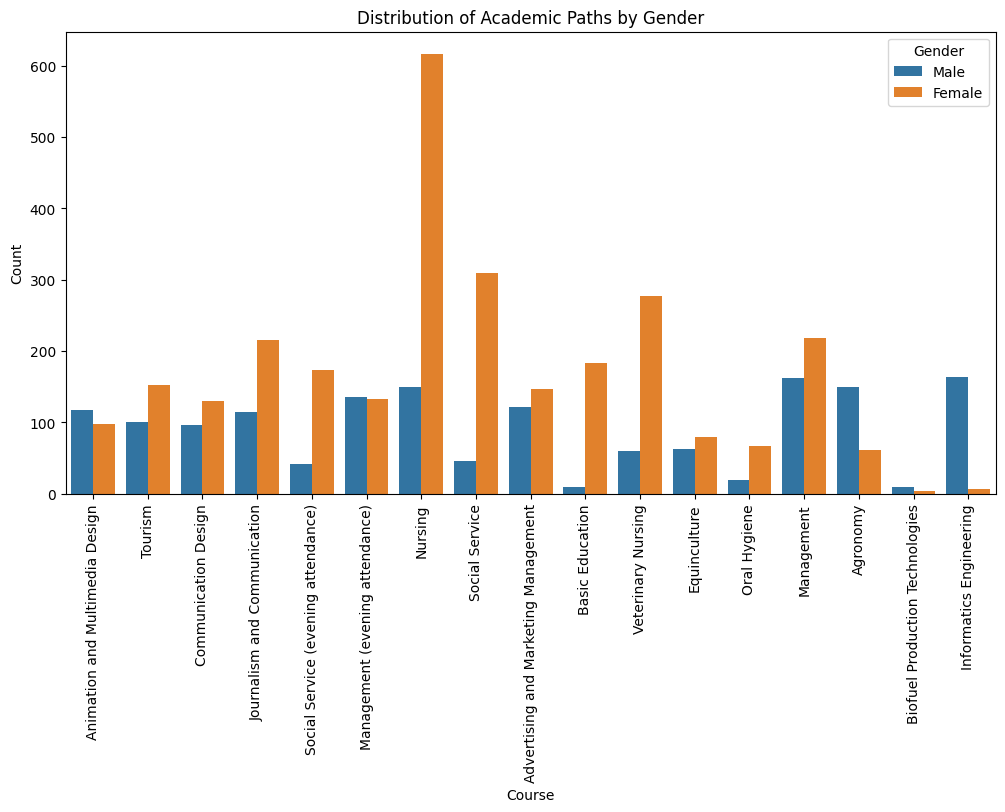

In [15]:
# Assuming 'data' is your DataFrame containing the 'Gender' and 'Course' columns
plt.figure(figsize=(12, 6))
sns.countplot(x='Course', hue='Gender', data=data)
plt.title('Distribution of Academic Paths by Gender')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()

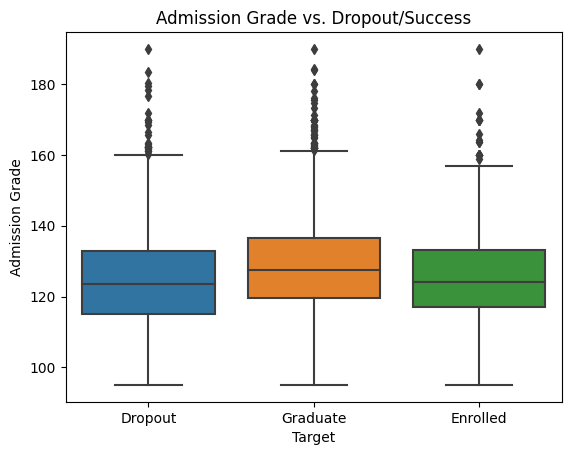

In [16]:
sns.boxplot(x='Target', y='Admission grade', data=data)
plt.title('Admission Grade vs. Dropout/Success')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.show()

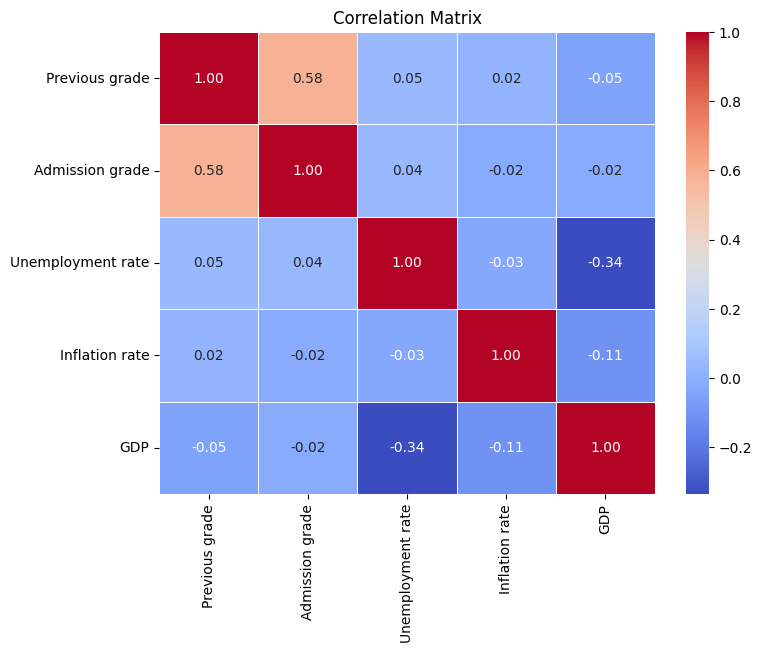

In [17]:
# Assuming 'data' is your DataFrame containing the relevant continuous variables
# Select only the continuous variables for correlation analysis
continuous_columns = ['Previous grade', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP']

# Calculate the correlation matrix
correlation_matrix = data[continuous_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Discussions and Conclusions

Some conclusions that we can draw of these graphs and charts is that females have a higher success rate than males. The grades of both of the genders are both similar but the success rate of females is almost 58% while the males are at 35%. There is very minimal difference between the grades of students who dropout compared to students who graduated. The means of the graduates are slightly higher but remain very similar to the dropouts. We can also see that there is a positive correlation between the previous grade of the student compared to their current graduating/dropout grade. There isn't much change to the grades when the finish school, but we do see a slight correlation between grades and unemployment rate.

## Model Approach

### Models to Try and Reasons:

`Logistic Regression:` Logistic regression is a common and interpretable classification algorithm that can be used for binary or multi-class classification tasks. It's a good starting point for your project due to its simplicity and ability to provide insights into feature importance.

`Random Forest Classifier:` Random Forest is an ensemble learning algorithm that can handle complex interactions between features and provide robust predictions. It can also handle missing data and outliers well, making it suitable for your dataset.

`Support Vector Machines (SVM):` SVM is effective for binary classification and can be extended to multi-class problems. SVM is particularly useful when there is a clear separation between classes in the feature space.

`Gradient Boosting Classifier:` Gradient Boosting is an ensemble technique that builds multiple weak learners to create a strong predictor. It is often one of the top-performing algorithms in many classification tasks.



### Model Difficulties and Solutions:

`Imbalanced Classes:` Since you have a multi-class classification problem, the classes (dropout, enrollment, graduation) might be imbalanced, with one class being more prevalent than the others. This could lead to biased models. Consider using techniques such as oversampling, undersampling, or class weighting to handle class imbalance.

`Feature Selection:` With a large number of features in the dataset, you may encounter the curse of dimensionality, which can affect model performance. Feature selection techniques, such as recursive feature elimination or feature importance from ensemble methods, can help identify the most relevant features.

`Hyperparameter Tuning:` Each model has hyperparameters that need to be tuned for optimal performance. Use techniques like grid search or random search to find the best combination of hyperparameters for each model.

`Data Preprocessing:` Ensure that the data is preprocessed correctly, including handling missing values, encoding categorical variables, and scaling numerical features. Data preprocessing can significantly impact model performance.

`Interpretability:` Some models, such as random forests and gradient boosting, might lack interpretability compared to simpler models like logistic regression. Consider using techniques like SHAP (SHapley Additive exPlanations) values or LIME (Local Interpretable Model-agnostic Explanations) to explain model predictions.